In [110]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import classification_report , plot_confusion_matrix


In [90]:
df=pd.read_excel('satisfaction.xlsx', index_col='id')
df.head()

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 11112 to 84566
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction_v2                    129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1

In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


In [93]:
df.isna().sum()

satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [94]:
df=df.dropna()

In [95]:
df.isna().sum()

satisfaction_v2                      0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [96]:
y=df['satisfaction_v2']
y

id
11112                   satisfied
110278                  satisfied
103199                  satisfied
47462                   satisfied
120011                  satisfied
                   ...           
119211                  satisfied
97768     neutral or dissatisfied
125368    neutral or dissatisfied
251       neutral or dissatisfied
84566     neutral or dissatisfied
Name: satisfaction_v2, Length: 129487, dtype: object

In [97]:
x=df.drop('satisfaction_v2',1)
x

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
11112,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
110278,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
103199,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
47462,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
120011,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119211,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
97768,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
125368,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0


In [98]:
x.Class.unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [99]:
le= preprocessing.LabelEncoder()
le.fit(x.Class)
#list(le.classes_)
#['Eco','Business','Eco Plus']
#le.transform

pd.Series(le.transform(x.Class)).unique()

array([1, 0, 2])

In [100]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in x.columns:
    if x.dtypes[col]=='object':
        print(col)
        x[col] = le.fit_transform(x[col])

Gender
Customer Type
Type of Travel
Class


In [101]:
x

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
11112,0,0,65,1,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
110278,1,0,47,1,0,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
103199,0,0,15,1,1,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
47462,0,0,60,1,1,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
120011,0,0,70,1,1,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119211,0,1,29,1,1,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
97768,1,1,63,1,0,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
125368,1,1,69,1,1,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0


In [18]:
# TRAIN TEST SPLIT

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 ,random_state = 42)

In [104]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (103589, 22)
x_test (25898, 22)
y_train (103589,)
y_test (25898,)


In [22]:
#KNeighborsClassifier

In [105]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

In [106]:
model.fit(x_train , y_train)
model.score(x_test, y_test)


0.7049965248281721

In [26]:
#Decision Tree

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

y_pred_dt = dt_classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred_dt)


corr_pred = cm[0, 0] + cm[1, 1]
total = cm.sum()
corr_pred_per_dt = round(corr_pred/total*100, 2)
print('Pourcentage de prediction: ', corr_pred_per_dt)

Pourcentage de prediction:  94.01


In [122]:
cm

array([[11047,   774],
       [  776, 13301]])

                         precision    recall  f1-score   support

neutral or dissatisfied       0.93      0.93      0.93     11821
              satisfied       0.95      0.94      0.94     14077

               accuracy                           0.94     25898
              macro avg       0.94      0.94      0.94     25898
           weighted avg       0.94      0.94      0.94     25898



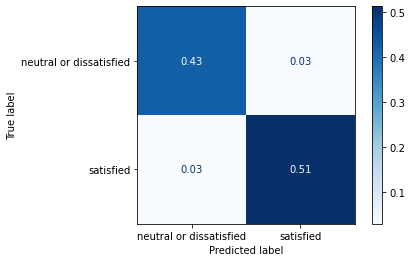

In [123]:
print(classification_report(y_test, y_pred_dt))
plot_confusion_matrix(dt_classifier, x_test, y_test,cmap=plt.cm.Blues, normalize = 'all')

In [29]:
#Random Forest Classifier

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.metrics import confusion_matrix

rf_clf = ensemble.RandomForestClassifier(n_estimators=10)
rf_clf.fit(x_train,y_train)
rf_clf.score(x_test,y_test)

test_pred_rf = rf_clf.predict(x_test)

cm = confusion_matrix(y_test, test_pred_rf)
corr_pred = cm[0, 0] + cm[1, 1]

total = cm.sum()
corr_pred_per_rf = round(corr_pred/total*100, 2)
print('Pourcentage de prediction: ', corr_pred_per_rf)

Pourcentage de prediction:  95.19


In [125]:
cm

array([[11371,   450],
       [  795, 13282]])

                         precision    recall  f1-score   support

neutral or dissatisfied       0.93      0.96      0.95     11821
              satisfied       0.97      0.94      0.96     14077

               accuracy                           0.95     25898
              macro avg       0.95      0.95      0.95     25898
           weighted avg       0.95      0.95      0.95     25898



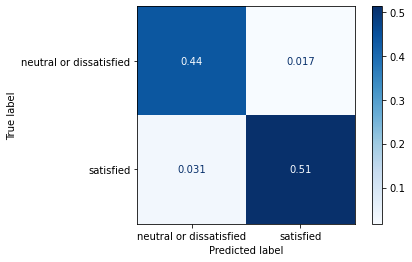

In [126]:
print(classification_report(y_test, test_pred_rf))
plot_confusion_matrix(rf_clf, x_test, y_test,cmap=plt.cm.Blues, normalize = 'all')

In [31]:
#Logistic Regression

In [32]:
#RESULTAT LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train,y_train)
model.score(x,y)

/Users/madeu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7887973310062014

In [106]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [107]:
x, y = make_classification(
    n_samples=10000,
    n_features =1,
    n_classes =2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

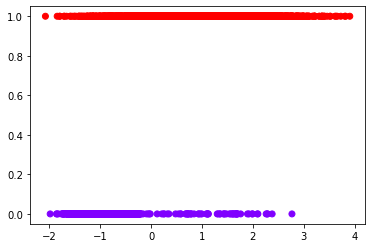

In [108]:
plt.scatter(x, y, c=y, cmap='rainbow')
plt.show()

In [109]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 ,random_state = 42)

In [110]:
#Logistic regression sur notre dataset

log_reg= LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [111]:
print(log_reg.coef_)

[[4.29971627]]


In [112]:
print(log_reg.intercept_)

[1.48231604]


In [113]:
ypred= log_reg.predict(x_test)

In [114]:
# haut-gauche = on a prédit un résultat + et il est +
# bas-droite = on a prédit un résultat - et il est -
# haut-droite = on a prédit un résultat + et il est -
# bas-droite = on a prédit un résultat - et il est +
confusion_matrix(y_test, ypred)

array([[1014,   26],
       [  53,  907]])

In [115]:
# Colonne gauche = prédiction fausse
# Colonne droite = Prédiction vraie

log_reg.predict_proba(x_test)

array([[0.58019942, 0.41980058],
       [0.16100938, 0.83899062],
       [0.95091265, 0.04908735],
       ...,
       [0.87044589, 0.12955411],
       [0.8873511 , 0.1126489 ],
       [0.00175612, 0.99824388]])

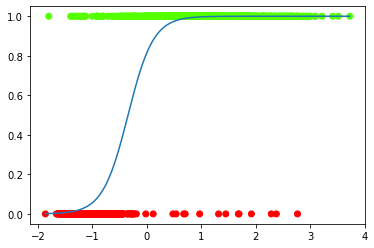

In [116]:
# Create and sort a dataframe containing our data
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
df = df.sort_values(by='x')


# The expit function, also known as the logistic function, is defined as expit(x) = 1/(1+exp(-x)).
# It is the inverse of the logit function.
from scipy.special import expit
sigmoid_function = expit(df['x'] * log_reg.coef_[0][0] + log_reg.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='prism')
plt.show()